In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler


In [2]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'bitcoin_data.csv')
MODEL_PATH = os.path.join(BASE_DIR, '..', 'models', 'bitcoin_lstm.h5')
SCALER_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler.gz')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
prediccion del valor delbitcoin mañana: 88300.95 USD


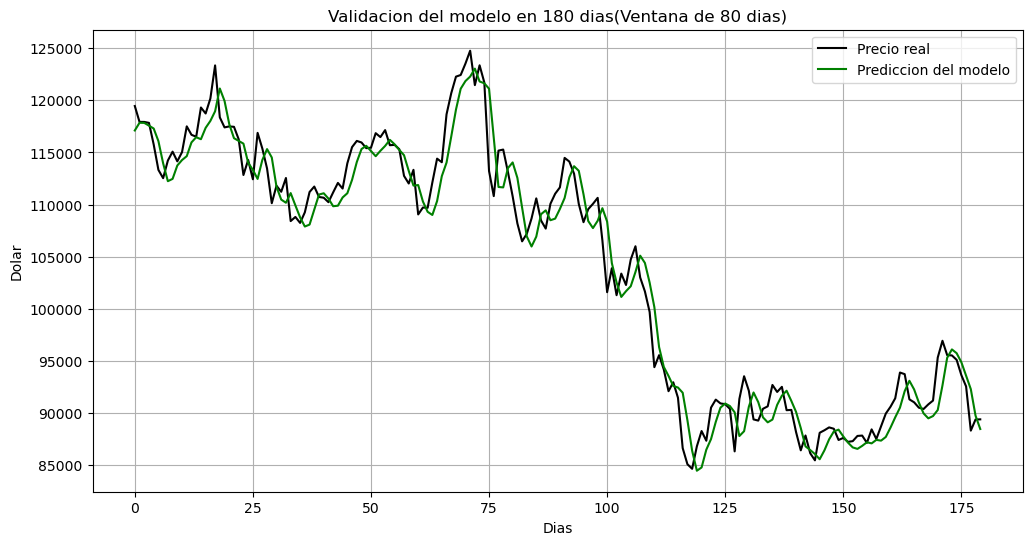

In [3]:
def fp():

    model = load_model(MODEL_PATH)
    scaler =joblib.load(SCALER_PATH)

    df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
    data = df.values
    scaled_data = scaler.transform(data)

    PD = 80 # debe ser igual al de train
    x_test = []
    y_test = []

    start_index = len(scaled_data) - 180 #dias

    for i in range(start_index, len(scaled_data)):
        x_test.append(scaled_data[i-PD:i, 0])
        y_test.append(scaled_data[i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #prediccion sobre datos conocidos
    predicted_prices = model.predict(x_test)
    #invertir escala
    predicted_prices = scaler.inverse_transform(predicted_prices)
    real_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    #prediccion a futuro 
    l_d = scaled_data[-PD:]
    l_d = l_d.reshape(1, PD, 1)

    tomorrow_prediction = model.predict(l_d)
    tomorrow_price = scaler.inverse_transform(tomorrow_prediction)
    print(f"prediccion del valor delbitcoin mañana: {tomorrow_price[0][0]:.2f} USD")

    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color='black', label='Precio real')
    plt.plot(predicted_prices, color='green', label='Prediccion del modelo')
    plt.title(f'Validacion del modelo en 180 dias(Ventana de {PD} dias)')
    plt.xlabel('Dias')
    plt.ylabel('Dolar')
    plt.legend()
    plt.grid(True)
    plt.show()

fp()

In [4]:
DATA_PATH2 = os.path.join(BASE_DIR, '..', 'data', 'clp_data.csv')
MODEL_PATH2 = os.path.join(BASE_DIR, '..', 'models', 'clp_lstm.h5')
SCALER_PATH2 = os.path.join(BASE_DIR, '..', 'models', 'scaler_clp.gz')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
prediccion del valor del peso chileno mañana: 884.90 USD


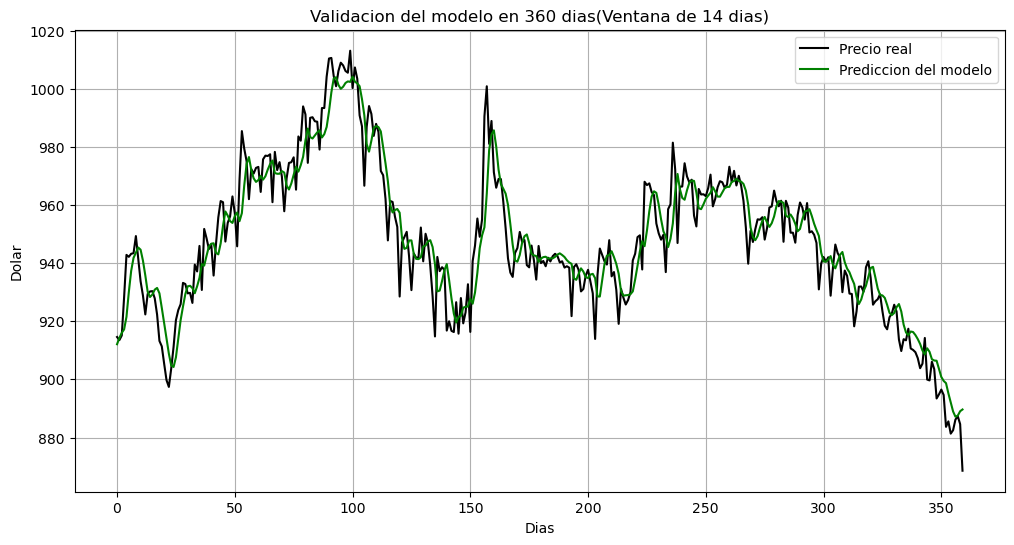

In [5]:
def fp():

    model = load_model(MODEL_PATH2)
    scaler =joblib.load(SCALER_PATH2)

    df = pd.read_csv(DATA_PATH2, index_col=0, parse_dates=True)
    data = df.values
    scaled_data = scaler.transform(data)

    PD = 14 # debe ser igual al de train
    x_test = []
    y_test = []

    start_index = len(scaled_data) - 360 #dias

    for i in range(start_index, len(scaled_data)):
        x_test.append(scaled_data[i-PD:i, 0])
        y_test.append(scaled_data[i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #prediccion sobre datos conocidos
    predicted_prices = model.predict(x_test)
    #invertir escala
    predicted_prices = scaler.inverse_transform(predicted_prices)
    real_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    #prediccion a futuro 
    l_d = scaled_data[-PD:]
    l_d = l_d.reshape(1, PD, 1)

    tomorrow_prediction = model.predict(l_d)
    tomorrow_price = scaler.inverse_transform(tomorrow_prediction)
    print(f"prediccion del valor del peso chileno mañana: {tomorrow_price[0][0]:.2f} USD")

    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color='black', label='Precio real')
    plt.plot(predicted_prices, color='green', label='Prediccion del modelo')
    plt.title(f'Validacion del modelo en 360 dias(Ventana de {PD} dias)')
    plt.xlabel('Dias')
    plt.ylabel('Dolar')
    plt.legend()
    plt.grid(True)
    plt.show()

fp()

el modelo cree que el dolar va a subir pero la realidad es que sigue bajando